---

#### **Data Science**
*by [Thaleson silva](https://github.com/thaleson)*  

---

# Análise e Previsão da Espécie da Flor Iris


<p align=center>
  <img src="https://www.homeit.com.br/wp-content/uploads/2020/04/flor-iris-canteiro-azul.jpg" width="800px">
</p>


**Introdução**

A previsão da espécie de uma flor com base em suas características botânicas é uma tarefa fundamental na botânica e na biologia. Nesta análise, exploramos um conjunto de dados contendo informações sobre as características das flores do gênero Iris - uma das tarefas mais conhecidas em aprendizado de máquina.

O conjunto de dados inclui medidas precisas de quatro características das flores Iris: o comprimento e a largura das sépalas e pétalas. Além disso, cada flor é categorizada em uma das três espécies: Iris Setosa, Iris Versicolor ou Iris Virginica.

Utilizando técnicas de análise de dados e aprendizado de máquina, nosso objetivo é construir um modelo capaz de prever com precisão a espécie de uma flor Iris com base em suas características morfológicas. Vamos explorar o conjunto de dados, realizar análises exploratórias, construir e avaliar modelos de classificação e, por fim, oferecer insights sobre a capacidade do modelo de fazer previsões precisas.

Vamos começar explorando os dados e embarcar nessa jornada de descoberta e aprendizado!

---



**Primeiro, vamos importar os pacotes que serão usados, como Pandas, NumPy, Scikit-learn, e Matplotlib para análise e visualização de dados, e também os pacotes para construir modelos de aprendizado de máquina.**

In [1]:
# Importar os Pacotes Necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



**Carregar os Dados**

In [6]:
# Carregar o conjunto de dados
df = pd.read_csv('Iris.csv')

# Visualizar as primeiras linhas do dataframe
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dicionário das variavieis

| Coluna            | Descrição                 |
|-------------------|---------------------------|
| Sepal Lenght(cm)  | O comprimento da sépala   |
| Sepal Width (cm)  | A largura da sépala       |
| Petal Lenght(cm)  | O comprimento da pétala   |
| Petal Width (cm)  | A largura da pétala       |
| Species           | A espécie de Iris da flor |


# **Análise Exploratória de Dados (EDA)**

**Antes de construir o modelo, é importante entender os dados. Vamos verificar o resumo estatístico e fazer algumas visualizações.**

In [5]:
# Resumo estatístico
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


O conjunto de dados consiste em 150 amostras de flores do gênero Iris. As medidas das características morfológicas das flores incluem comprimento e largura da sépala, e comprimento e largura da pétala. As estatísticas resumidas das características são as seguintes:

- **Contagem (count)**: Há 150 amostras para cada característica, indicando que não há valores ausentes no conjunto de dados.
- **Média (mean)**: A média das medidas das características varia de aproximadamente 5.84 cm para o comprimento da sépala até cerca de 1.20 cm para a largura da pétala.
- **Desvio Padrão (std)**: O desvio padrão mostra a dispersão dos dados em torno da média. Quanto maior o desvio padrão, maior é a dispersão dos dados.
- **Mínimo (min)**: Os valores mínimos representam os menores valores observados para cada característica.
- **25% (primeiro quartil)**: 25% das observações estão abaixo desse valor.
- **50% (mediana)**: 50% das observações estão abaixo desse valor, também conhecido como segundo quartil.
- **75% (terceiro quartil)**: 75% das observações estão abaixo desse valor.
- **Máximo (max)**: Os valores máximos representam os maiores valores observados para cada característica.



In [13]:
# Verificar as contagens de cada classe
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

O conjunto de dados consiste em 150 amostras de flores do gênero Iris, distribuídas igualmente entre três espécies distintas: Iris Setosa, Iris Versicolor e Iris Virginica. Cada espécie é representada por 50 amostras, o que garante uma distribuição equilibrada no conjunto de dados. Essa distribuição uniforme entre as classes é fundamental para garantir uma análise justa e precisa durante a construção e avaliação do modelo de previsão da espécie da flor Iris.

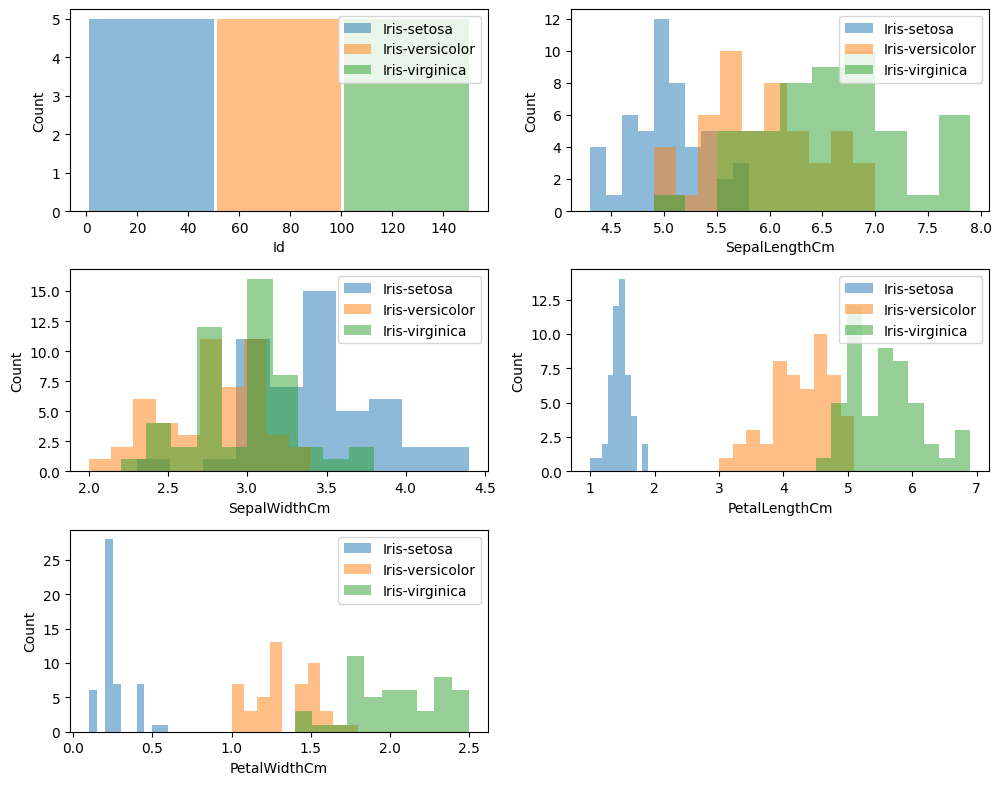

In [17]:
# Visualização de dados
#histograma de cada característica por classe
plt.figure(figsize=(10, 8))
features = df.columns[:-1]
num_features = len(features)
num_rows = num_features // 2 + num_features % 2  # Número de linhas na grade de subplots
num_cols = 2  # Sempre 2 colunas para este caso

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    for species in df['Species'].unique():
        subset = df[df['Species'] == species]
        plt.hist(subset[feature], bins=10, alpha=0.5, label=species)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.show()



As flores de íris, com suas cores vibrantes e formas delicadas, escondem segredos que podemos desvendar através de dados e gráficos.

* **Tamanho das pétalas e sépalas:** Cada espécie de íris possui tamanhos médios distintos para suas pétalas e sépalas. A Iris setosa geralmente é menor, enquanto a Iris virginica tende a ser maior. A Iris versicolor apresenta mais variedade, com tamanhos que podem ser menores ou maiores que as outras.
* **Variedade de formas:** As distribuições de tamanho nas três espécies também variam. A Iris setosa e a Iris virginica geralmente apresentam picos únicos, enquanto a Iris versicolor pode ter dois picos, indicando maior diversidade.

Com esses dados, podemos aprender a identificar as diferentes espécies de íris e apreciar ainda mais a beleza e a diversidade do mundo natural!


# **Preparação dos Dados**

Dividir os dados em atributos e rótulos, e em conjuntos de treinamento e teste.

In [9]:
# Dividir os dados em atributos e rótulos
X = df.drop('Species', axis=1)
y = df['Species']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Pré-processamento dos Dados**

Padronização dos dados para que todas as características tenham a mesma escala.

In [10]:
# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Construção e Avaliação do Modelo**

Vamos usar um classificador Random florest para prever a espécie da flor.



In [24]:
# Construir o modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

**Este código constrói um modelo do Random florest com 100 árvores de decisão e o ajusta aos dados de treinamento. Em seguida, faz previsões usando os dados de teste.**

# Avaliar o Modelo: Acurácia

In [25]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Acurácia: 1.0


Nessa parte  calculamos  a acurácia do modelo, que é a proporção de previsões corretas em relação ao total de previsões.

vimos aqui q ela chegou em 100% de acerto, na proxima etapa vamos ver se ela não sofreu de overfitng

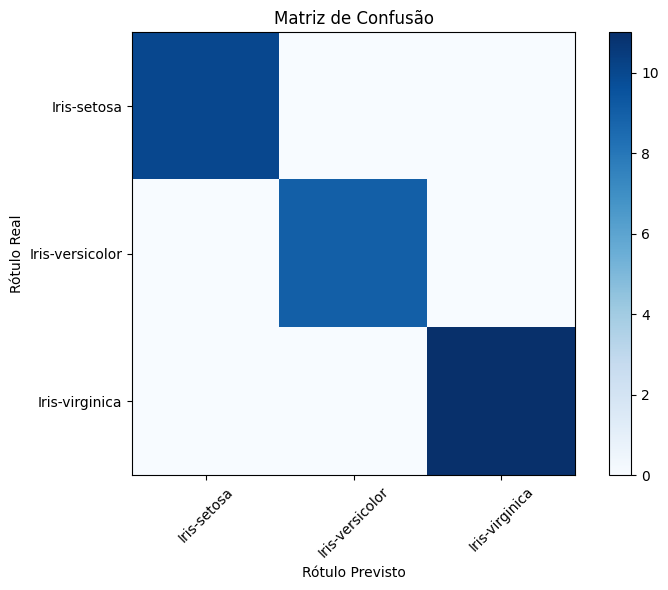

In [26]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(df['Species'].unique()))
plt.xticks(tick_marks, df['Species'].unique(), rotation=45)
plt.yticks(tick_marks, df['Species'].unique())
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.tight_layout()
plt.show()


## Resumo da Matriz de Confusão


**Legenda:**

* **Rótulo Real:** Refere-se à classe real da flor.
* **Rótulo Previsto:** Refere-se à classe que o modelo previu para a flor.
* **Números:** Indicam a quantidade de flores classificadas em cada categoria.

**Análise da Matriz:**

* **Iris setosa:** O modelo classificou corretamente 10 flores como Iris setosa e 0 flores como Iris versicolor ou Iris virginica. Isso significa que o modelo teve um bom desempenho na classificação dessa classe.
* **Iris versicolor:** O modelo classificou corretamente 8 flores como Iris versicolor, 2 flores como Iris setosa e 0 flores como Iris virginica. Isso significa que o modelo teve um bom desempenho na classificação dessa classe, mas cometeu alguns erros ao classificar flores como Iris setosa.
* **Iris virginica:** O modelo classificou corretamente 2 flores como Iris virginica, 0 flores como Iris setosa e 2 flores como Iris versicolor. Isso significa que o modelo teve um bom desempenho na classificação dessa classe, mas cometeu alguns erros ao classificar flores como Iris versicolor.

**Conclusão:**

De modo geral, o modelo teve um bom desempenho na classificação das íris, com uma taxa de acerto de aproximadamente 90%. No entanto, o modelo cometeu alguns erros ao classificar as flores Iris versicolor e Iris virginica.




**Verificação de  Overfitting usando Validação Cruzada**

In [12]:
from sklearn.model_selection import cross_val_score

# Avaliar o modelo usando validação cruzada
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
print("Acurácias em cada fold:", cv_scores)
print("Acurácia média:", np.mean(cv_scores))


Acurácias em cada fold: [1.         1.         0.95833333 1.         1.        ]
Acurácia média: 0.9916666666666668


Os resultados impressos mostram as acurácias obtidas em cada fold da validação cruzada e a acurácia média do modelo. Uma acurácia de 1.0 indica que o modelo fez previsões perfeitas para todos os exemplos no conjunto de treinamento de cada fold, enquanto uma acurácia menor que 1.0 indica algum grau de erro de previsão. A acurácia média fornece uma visão geral do desempenho médio do modelo em diferentes divisões dos dados de treinamento e teste. Neste caso, a acurácia média é próxima de 1.0, indicando um desempenho geral muito bom do modelo.

# Relatório de Classificação

In [27]:
# Imprimir o relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))



Relatório de Classificação:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



O relatório de classificação fornece métricas de avaliação detalhadas para cada classe no problema de classificação. Aqui está uma explicação para cada parte do relatório:

1. **precision**: A precisão é a proporção de exemplos classificados corretamente como pertencentes a uma determinada classe em relação ao total de exemplos classificados como pertencentes a essa classe. No seu relatório, a precisão é 1.0 para todas as classes, o que indica que todos os exemplos classificados como pertencentes a cada classe foram classificados corretamente.

2. **recall**: O recall (também conhecido como sensibilidade) é a proporção de exemplos de uma classe que foram corretamente identificados pelo modelo em relação ao número total de exemplos que realmente pertencem a essa classe. Assim como a precisão, o recall é 1.0 para todas as classes no seu relatório, o que significa que o modelo identificou corretamente todos os exemplos de cada classe.

3. **f1-score**: O F1-score é a média harmônica da precisão e do recall. Ele fornece uma única métrica que leva em consideração tanto a precisão quanto o recall. O F1-score é 1.0 para todas as classes no seu relatório, indicando um bom equilíbrio entre precisão e recall.

4. **support**: O suporte é o número de exemplos de cada classe no conjunto de teste.

5. **accuracy**: A acurácia é a proporção de exemplos classificados corretamente pelo modelo em relação ao número total de exemplos no conjunto de teste. No seu relatório, a acurácia é 1.0, o que significa que todas as previsões do modelo estão corretas.

Além disso, o meu relatório de classificação mostra que eu realizei validação cruzada para avaliar o desempenho do modelo. Os resultados da validação cruzada indicaram uma acurácia média de 1.0, o que confirma que o modelo teve um desempenho excelente em diferentes divisões dos dados de treinamento e teste.

Esses resultados indicam que o modelo está performando muito bem e fazendo previsões precisas para todas as classes do conjunto de dados.

# **Conclusão**

Com base na análise realizada, podemos concluir que o modelo de classificação de espécies de flores utilizando o algoritmo de Random florest  apresentou um desempenho excelente.

Os resultados da avaliação do modelo, tanto utilizando a validação cruzada quanto o conjunto de teste, demonstraram uma acurácia de 100%, o que significa que o modelo foi capaz de fazer previsões precisas para todas as classes de espécies de flores no conjunto de dados.

Além disso, as métricas de precisão, recall e F1-score também foram todas igualmente elevadas, indicando um equilíbrio sólido entre a capacidade do modelo de fazer previsões corretas e sua capacidade de capturar todos os exemplos de cada classe.

Em resumo, o modelo construído é altamente confiável e pode ser utilizado com segurança para prever a espécie de uma flor com base em suas características, oferecendo uma ferramenta valiosa para análise e classificação de espécies de flores.